# Custom Class

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
'''
Going to define a custom class, each instance is the information on a single stock, will then define a seperate 
analysing class to compare stocks

This class StockInfo will contain all information about a stock between a certain period specified and will 
also be able to compute relevant mathematical computations on the stock info, as well as plot some key graphs.
'''

class StockInfo():
    '''
    This class gathers the 'Adj Close' prices of the stock with ticker = ticker
    
    When you initiate the function you have the option to select a start and end date, if none are inputted,
    all possible data will be selected. The data is stored in a pandas DataFrame.
    '''
    def __init__(self, ticker: str, start = None, end = None, interval = '1d') -> pd.DataFrame:
        adj_close_prices = yf.download(ticker, start = start, end = end, interval = interval)['Adj Close'].to_frame()
        
        self.data = adj_close_prices.rename(columns = {'Adj Close' : f"{ticker}"})
        self.ticker = ticker

    def default_period(self, period):
        if not period:
            period = [self.data.index[0], self.data.index[-1], 1]
        return period

    '''
        For Displaying info about the Stock Prices
                                                    '''

    def display_data(self, period = None):
        period = self.default_period(period)
        return self.data.loc[period[0] : period[1]]

    def plot_stock_price(self, period = None):
        period, segment = self.default_period(period), self.display_data(period)
        segment.plot()

    '''
        THESE METHODS HELP YOU WORK WITH RETURNS 
                                                    '''
    
    # 'returns' function outputs the returns of the stock in a given interval
    def df_returns(self, period = None) -> pd.DataFrame:
        period = self.default_period(period)
        segment = self.data.loc[period[0] : period[1]]
        return segment.div(segment.iloc[0]).mul(period[2])

    def returns(self, period = None) -> float:
        return_df = self.df_returns(period)
        return return_df.iloc[-1] - return_df.iloc[0]

    def perc_returns(self, period = None) -> float:
        return_df = self.df_returns(period)
        return (return_df.iloc[-1] - return_df.iloc[0]) / return_df.iloc[0] * 100

    def plot_returns(self, period = None):
        return_df = self.df_returns(period)
        return_df.plot()
    


    

    '''
        THESE METHODS HELP YOU WORK WITH VOLATILITY
                                                    '''

    def variance(self, period = None):
        period = self.default_period(period)
        segment = self.data.loc[period[0] : period[1]]
        return segment.pct_change().mul(100).dropna().var()

    def sigma(self, period = None):
        return np.sqrt(self.variance(period))


    '''
        Augmented Dickey-Fuller Test
                                    '''

    def adf_test(self, period = None, graph = False):
        period = self.default_period(period)
        segment = self.data.loc[period[0] : period[1]]
        arr = segment.iloc[:,0] # Converts 1D Pandas DataFrame to series
        result = adfuller(arr)
        if graph:
            self.plot_stock_price(period)
        return f" ADF Statistic: {result[0]} \np-value: {result[1]}"
        
        
        
        
        
msft = StockInfo('MSFT')

C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


## Rough Work

### Initialising

In [3]:
msft = StockInfo('MSFT')
msft.data

C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,MSFT
Date,
1986-03-13,0.060163
1986-03-14,0.062311
1986-03-17,0.063386
1986-03-18,0.061774
1986-03-19,0.060700
...,...
2024-02-12,414.493500
2024-02-13,405.570007
2024-02-14,409.489990


In [4]:
period = ['2012-01-01', '2013-01-02', 100]

' ADF Statistic: -1.8574887545757737 \np-value: 0.3523162255695427'

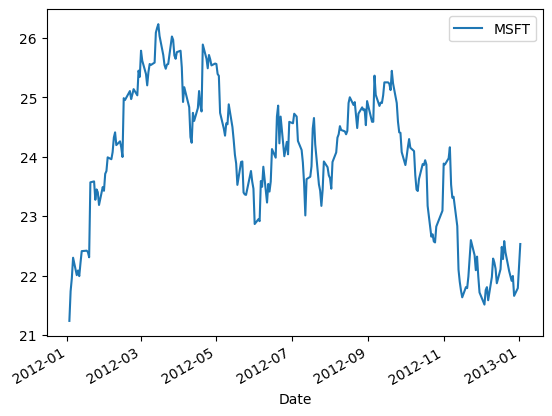

In [5]:
msft.adf_test(period, graph = True)

In [6]:
a = StockInfo('A')
a.data

C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,A
Date,
1999-11-18,26.695692
1999-11-19,24.496338
1999-11-22,26.695692
1999-11-23,24.268806
1999-11-24,24.913450
...,...
2024-02-12,132.309998
2024-02-13,129.759995
2024-02-14,132.240005


' ADF Statistic: -2.381697920279167 \np-value: 0.14696880319563838'

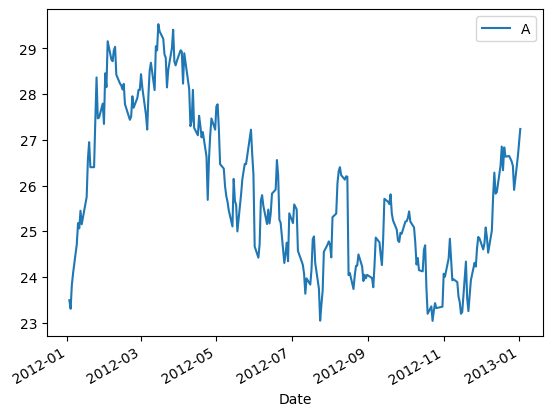

In [7]:
a.adf_test(period, graph = True)